## Time Series regression - SVM

In [12]:
# DAL Library
# version 2.1

source("../examples.R")

#loading DAL
load_dal() # see ../examples.R 

# needed for ts_svm.R
loadlibrary("e1071")

### Cosine series for studying

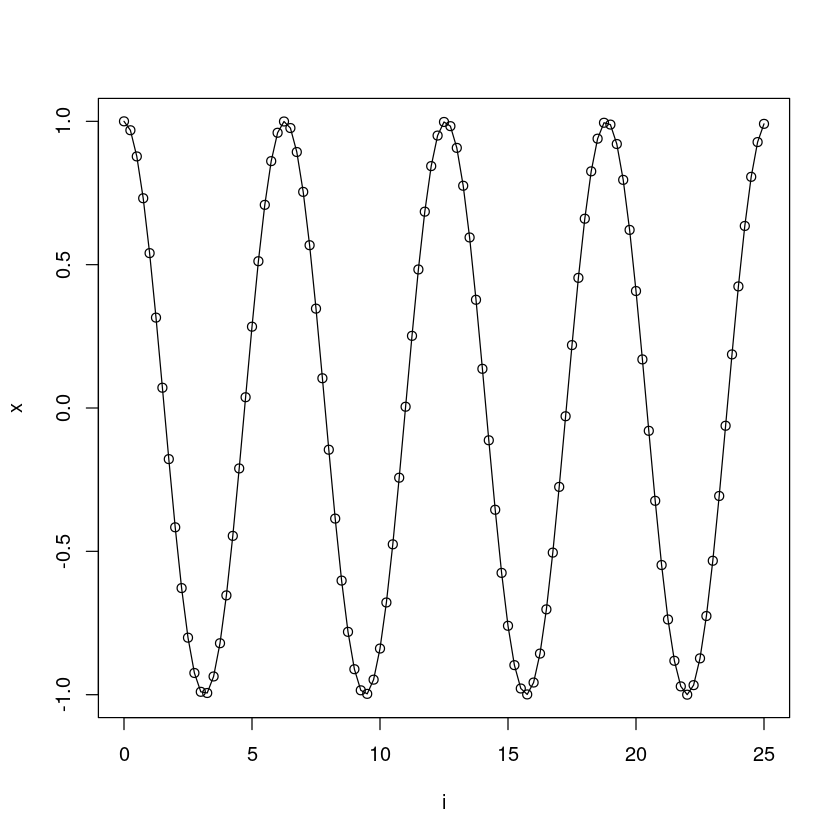

In [13]:
i <- seq(0, 25, 0.25)
x <- cos(i)

plot(i, x)
lines(i, x)

### sliding windows

In [14]:
sw_size <- 10
ts <- ts_data(x, sw_size)
head(ts, 3)

t9        t8        t7        t6        t5        t4         t3        
[1,] 1.0000000 0.9689124 0.8775826 0.7316889 0.5403023  0.3153224  0.0707372
[2,] 0.9689124 0.8775826 0.7316889 0.5403023 0.3153224  0.0707372 -0.1782461
[3,] 0.8775826 0.7316889 0.5403023 0.3153224 0.0707372 -0.1782461 -0.4161468
     t2         t1         t0        
[1,] -0.1782461 -0.4161468 -0.6281736
[2,] -0.4161468 -0.6281736 -0.8011436
[3,] -0.6281736 -0.8011436 -0.9243024

### data sampling

In [15]:
test_size <- 1
samp <- ts_sample(ts, test_size)
head(samp$train, 3)
head(samp$test)

t9        t8        t7        t6        t5        t4         t3        
[1,] 1.0000000 0.9689124 0.8775826 0.7316889 0.5403023  0.3153224  0.0707372
[2,] 0.9689124 0.8775826 0.7316889 0.5403023 0.3153224  0.0707372 -0.1782461
[3,] 0.8775826 0.7316889 0.5403023 0.3153224 0.0707372 -0.1782461 -0.4161468
     t2         t1         t0        
[1,] -0.1782461 -0.4161468 -0.6281736
[2,] -0.4161468 -0.6281736 -0.8011436
[3,] -0.6281736 -0.8011436 -0.9243024

t9         t8        t7         t6          t5        t4       t3      
[1,] -0.7256268 -0.532833 -0.3069103 -0.06190529 0.1869486 0.424179 0.635036
     t2        t1        t0       
[1,] 0.8064095 0.9276444 0.9912028

### data preprocessing

In [16]:
preproc <- ts_gminmax()

### Model training

In [17]:
model <- ts_svm(preproc, input_size=4)

io_train <- ts_projection(samp$train)
model <- fit(model, x=io_train$input, y=io_train$output)

print(describe(model))

ts_svm,0.000



[1] "ts_svm"


### Evaluation of adjustment

In [18]:
adjust <- predict(model, io_train$input)
ev_adjust <- evaluation.tsreg(io_train$output, adjust)
print(head(ev_adjust$metrics))

           mse        smape
1 9.740584e-08 0.0009130636


### Prediction of test

In [19]:
steps_ahead <- 1
io_test <- ts_projection(samp$test)
prediction <- predict(model, x=io_test$input, steps_ahead=steps_ahead)
prediction <- as.vector(prediction)

output <- as.vector(io_test$output)
if (steps_ahead > 1)
    output <- output[1:steps_ahead]

print(sprintf("%.2f, %.2f", output, prediction))

[1] "0.99, 0.99"


### Evaluation of test data

In [20]:
ev_test <- evaluation.tsreg(output, prediction)
print(head(ev_test$metrics))
print(sprintf("%s: smape: %.2f", describe(model), 100*ev_test$metrics$smape))

           mse        smape
1 2.618152e-08 0.0001632564
[1] "ts_svm: smape: 0.02"


### Plot results

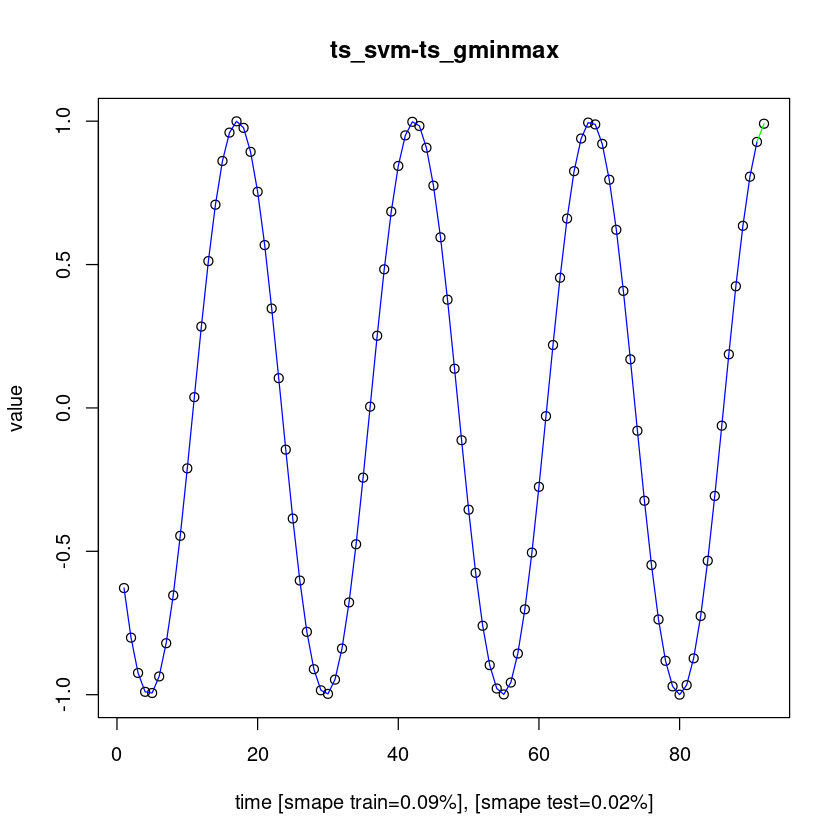

In [21]:
yvalues <- c(io_train$output, io_test$output)
tsplot(model, y=yvalues, yadj=adjust, ypre=prediction)